<a href="https://colab.research.google.com/github/pornima30/Real-Estate-Prediction-Using-ML/blob/main/Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

Loading Dataset

In [4]:
df=pd.read_csv("https://statso.io/wp-content/uploads/2023/12/Real_Estate.csv")

Previewing first 5 rows

In [5]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


Info about our dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


The dataset contains 7 columns. Here’s a brief overview of the columns:

- Transaction date: The date of the real estate transaction.
- House age: Age of the house in years.
- Distance to the nearest MRT station: Distance to the nearest Mass Rapid Transit station in meters.
- Number of convenience stores: Number of convenience stores in the vicinity.
- Latitude: Latitude of the property location.
- Longitude: Longitude of the property location.
- House price of unit area: House price of unit area.

Checking for null values

In [7]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

There are no null values in the dataset. Now, let’s have a look at the descriptive statistics of the dataset:

In [8]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


Let's take a look through histogram for all numerical objects

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

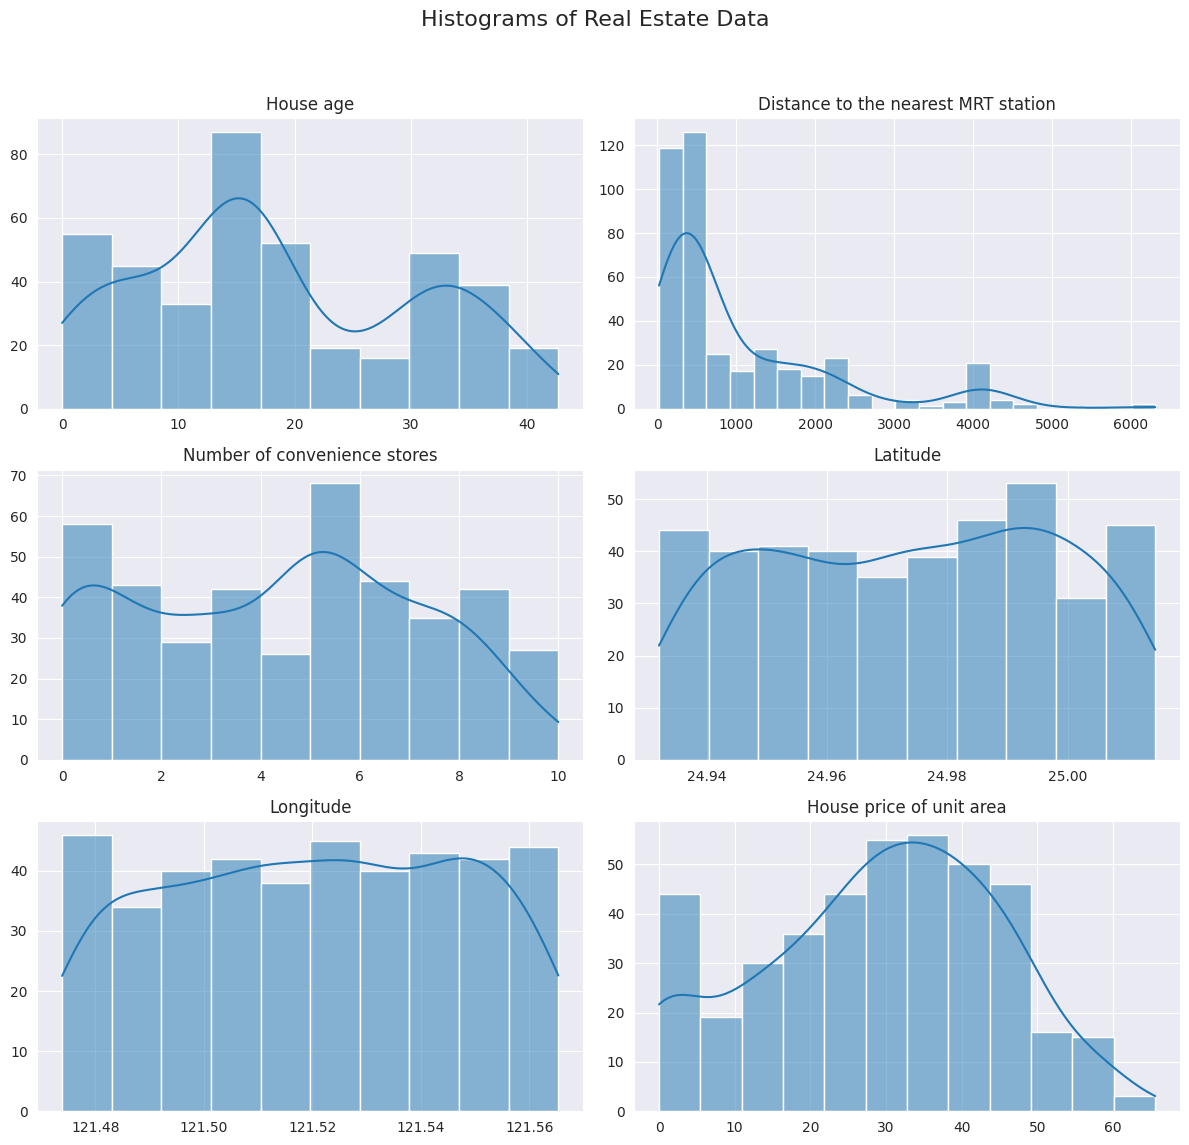

In [10]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The histograms offer valuable insights into the distribution patterns of each variable:

- House Age: Depicting a fairly even distribution with a slight uptick in the number of recently built properties (lower age).
- Distance to the Nearest MRT Station: Highlighting that the majority of properties are situated in close proximity to an MRT station, evident from the high frequency of shorter distances. However, a lingering tail extends toward greater distances, indicating the presence of properties situated at a considerable distance from MRT stations.
- Number of Convenience Stores: Illustrating a diverse range, with noticeable peaks at specific counts, such as 0, 5, and 10. This implies the existence of common configurations regarding the availability of convenience stores.
- Latitude and Longitude: Both showcasing concentrated distributions, suggesting that the properties are positioned within a geographically confined area.
- House Price of Unit Area: Exhibiting a distribution skewed to the right, with a concentration of properties in the lower price range and a decline in the number of properties as prices escalate.

Let's deep dive into data utilizing scatter plots to investigate the connections among these variables and housing prices will enable us to gain insights into the factors that potentially exert a more pronounced influence on property values.

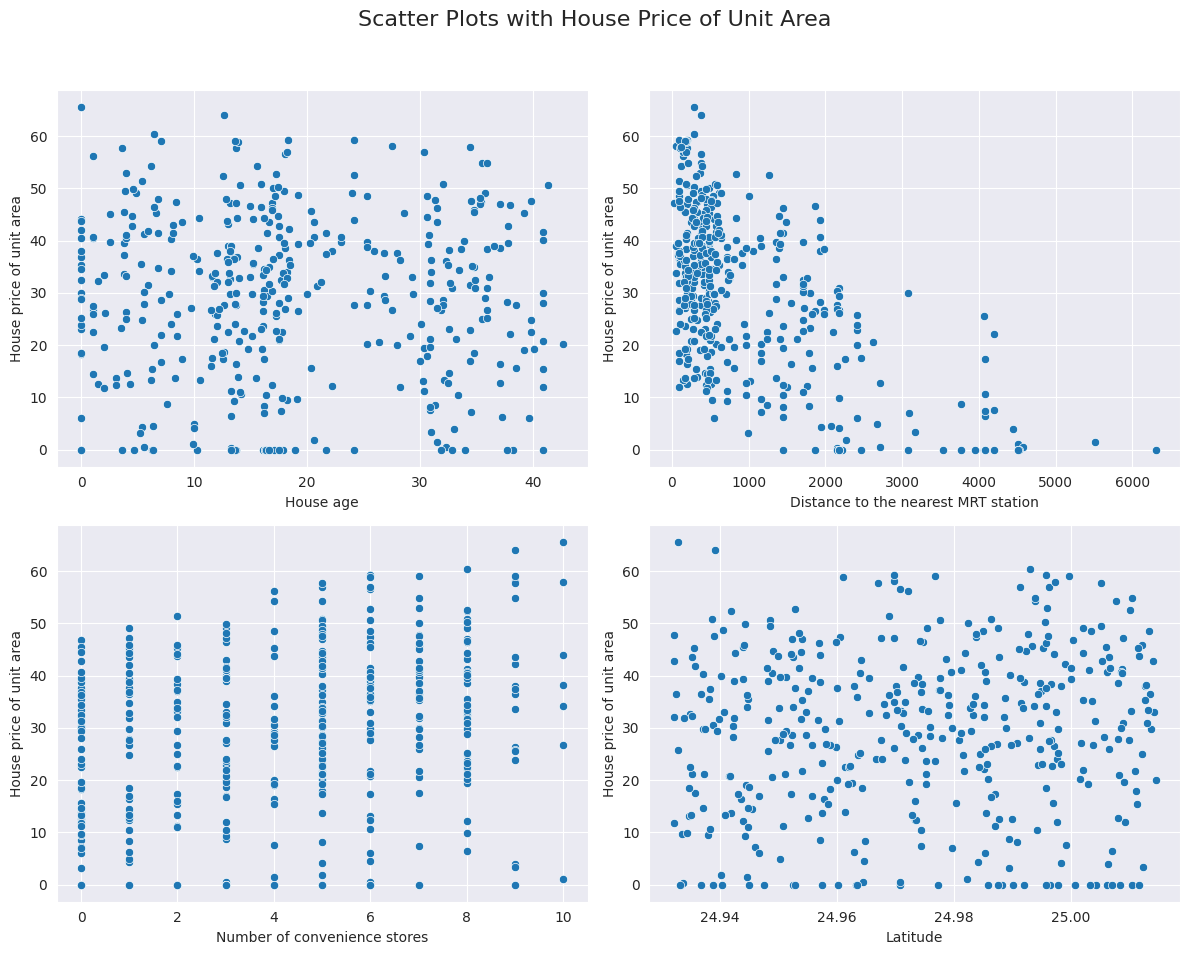

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=df, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=df, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=df, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=df, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The scatter plots unveil intriguing associations with house prices:

1. House Age vs. Price: No strong linear relationship, but very new and very old houses may exhibit higher prices.
2. Distance to Nearest MRT Station vs. Price: A clear trend indicates that as distance to the nearest MRT station increases, house prices tend to decrease—a robust negative correlation.
3. Number of Convenience Stores vs. Price: Positive relationship observed; houses near more convenience stores tend to have higher prices.
4. Latitude vs. Price: Although not strongly linear, discernible patterns suggest certain latitudes correspond to varying house prices, possibly indicating desirable neighborhoods.

Conducting a correlation analysis is recommended to quantify these relationships, especially their impact on house prices.

<ipython-input-12-7ad490a158e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


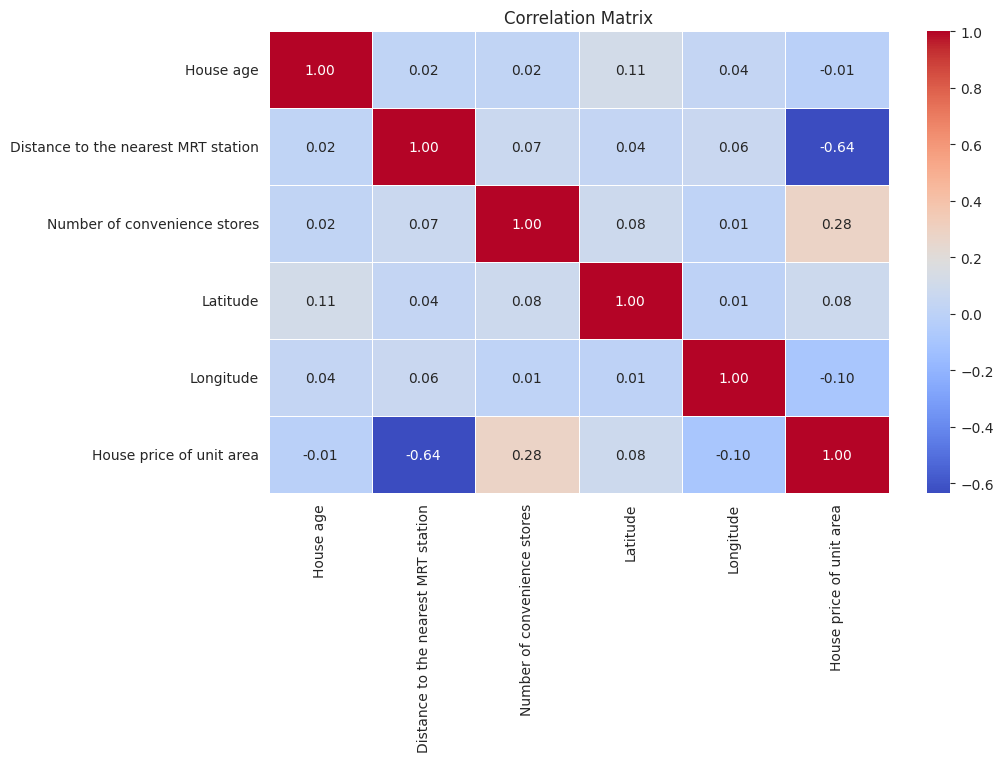

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

The correlation matrix quantifies the relationships between variables, particularly concerning house prices:

1. House Age: Exhibits a very weak negative correlation (-0.012) with house price, suggesting age isn't a strong predictor.
2. Distance to Nearest MRT Station: Strong negative correlation (-0.637), indicating that properties closer to MRT stations tend to have higher prices—a crucial factor in property valuation.
3. Number of Convenience Stores: Shows a moderate positive correlation (0.281) with house price, implying that more nearby convenience stores positively impact property prices.
4. Latitude and Longitude: Both have weak correlations with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).

In summary, proximity to MRT stations and the number of nearby convenience stores significantly influence house prices in this dataset. Geographical location (latitude and longitude) and house age appear to have less impact on price.

Next, constructing a regression model to forecast real estate prices utilizing the Linear Regression algorithm.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

Now, let's create a visual representation comparing the actual values to the predicted values to evaluate the performance of our model.

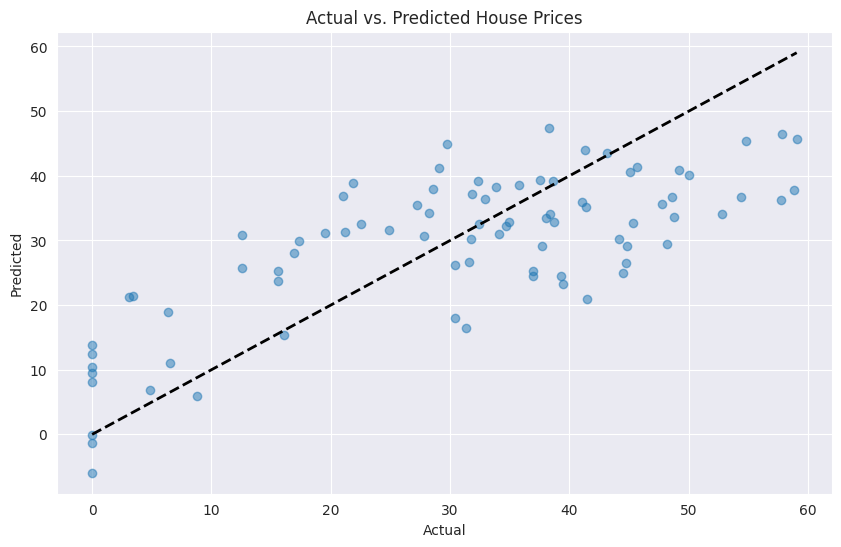

In [14]:
y_pred_lr = model.predict(X_test)

#actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

The dashed diagonal line signifies equality between actual and predicted values. Proximity to this line reflects accurate predictions. Notably:

- Numerous points closely align with the diagonal, indicating the model's generally accurate predictions for a substantial portion of the test set.
- Some points deviate further from the line, highlighting areas where the model's predictions differ more significantly from actual values.

This demonstrates our approach to predicting real estate prices with Python using Machine Learning.